# RETO: Optimización estocástica 


## Librerías

In [2]:
import numpy as np
import math
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from geopy.geocoders import Nominatim

random.seed(10)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Lectura de Datos

In [3]:
info_productos = pd.read_csv("Datos_reto/info_productos.csv")
info_compra = pd.read_excel("Datos_reto/informacion_compra.xlsx")
unidades_transporte = pd.read_excel("Datos_reto/Unidades_transporte.xlsx")
info_ubicaciones = pd.read_excel("Datos_reto/direcciones.xlsx")

## Exploración de Datos

In [72]:
info_ubicaciones.head()

,Colonia,codigo postal,Calle,numero de casa
0,FIERRO MTY,64590,JESUS M GARZA,4026
1,VALLE DE SANTA LUCIA MTY,64140,LIC PEDRO ZORRI,404
2,JARDINES DEL PAS MTY,64900,AVE FUNDADORES,5300
3,CIUDAD NATURA,64989,AV ABRAHAM LIN,4001
4,VILLA LOS PINOS MTY,64770,PINO SILVESTRE,2923


In [73]:
unidades_transporte = unidades_transporte.groupby(["Tipo Unidad", "Modelo"]).mean(numeric_only=True)
unidades_transporte

Largo mm  Ancho mm    Alto  Capacidad Vol m3  \
Tipo Unidad          Modelo                                                 
514 SEMI LONG S 300  2019      3080.0    1435.0  1932.0          8.539054   
716 LONG SERIE 300   2019      3080.0    1435.0  1932.0          8.539054   
CHASIS CABINA        2015      2235.0    1465.0  1932.0          6.325899   
                     2020      2445.0    1795.0  1932.0          8.479113   
                     2021      2391.0    1594.0  1932.0          7.363343   
ELF 300              2013      3162.0    1425.0  1932.0          8.705302   
                     2015      3162.0    1425.0  1932.0          8.705302   
MANAGER FURGON L2H2  2021      3120.0    1870.0  1932.0         11.500000   

                             Capacidad Carga kg  Consumo Gasolina km/L  \
Tipo Unidad          Modelo                                              
514 SEMI LONG S 300  2019                2470.0                   8.20   
716 LONG SERIE 300   2019                2470.0                   8.20   
CHASIS CABINA        2015                1480.0                  11.19   
                     2020                1206.0                  11.68   
                     2021                2880.0                  11.80   
ELF 300              2013                2500.0                  11.00   
                     2015                2500.0                   9.40   
MANAGER FURGON L2H2  2021                1850.0                  13.50   

                             Capacidad tanque L  
Tipo Unidad          Modelo                      
514 SEMI LONG S 300  2019                  70.0  
716 LONG SERIE 300   2019                  70.0  
CHASIS CABINA        2015                  60.0  
                     2020                  80.0  
                     2021                  80.0  
ELF 300              2013                  75.0  
                     2015                  75.0  
MANAGER FURGON L2H2  2021                 125.0

In [74]:
unidades_transporte.describe()

,Largo mm,Ancho mm,Alto,Capacidad Vol m3,Capacidad Carga kg,Consumo Gasolina km/L,Capacidad tanque L
count,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.000000
mean,2834.375000,1555.500000,1932.0,8.519633,2169.500000,10.621250,79.375000
std,400.778862,180.888284,0.0,1.468887,586.721399,1.870099,19.537053
min,2235.000000,1425.000000,1932.0,6.325899,1206.000000,8.200000,60.000000
25%,2431.500000,1432.500000,1932.0,8.200171,1757.500000,9.100000,70.000000
50%,3080.000000,1450.000000,1932.0,8.539054,2470.000000,11.095000,75.000000
75%,3130.500000,1644.250000,1932.0,8.705302,2500.000000,11.710000,80.000000
max,3162.000000,1870.000000,1932.0,11.500000,2880.000000,13.500000,125.000000


In [75]:
info_productos.head()

,Producto,Volumen mtro3
0,1,0.001050
1,2,0.026710
2,3,0.020000
3,4,0.056515
4,5,0.025238


In [76]:
info_productos.describe()

,Producto,Volumen mtro3
count,53632.000000,5.363200e+04
mean,26816.500000,1.117353e-01
std,15482.369155,3.267456e-01
min,1.000000,1.000000e-08
25%,13408.750000,9.568000e-04
50%,26816.500000,4.511000e-03
75%,40224.250000,5.044900e-02
max,53632.000000,6.272098e+00


In [77]:
info_productos.shape

(53632, 2)

In [78]:
print("Volumen promedio:", round(info_productos[" Volumen mtro3"].mean(), 2), "m3")

Volumen promedio: 0.11 m3


In [79]:
info_compra.head()

,Producto,Unidades,Factura
0,48443,1,799186
1,42877,1,717106
2,48296,1,468125
3,34704,1,176490
4,47158,2,674550


In [80]:
info_compra.shape

(31654, 3)

In [81]:
info_compra.describe()

,Producto,Unidades,Factura
count,31654.000000,31654.000000,31654.000000
mean,29598.876572,1.106432,580401.154862
std,12588.167286,0.613263,214301.475443
min,23.000000,1.000000,379.000000
25%,18267.000000,1.000000,448228.000000
50%,34248.000000,1.000000,654167.000000
75%,38167.000000,1.000000,734489.250000
max,53475.000000,20.000000,997165.000000


In [82]:
clientes = info_compra.groupby("Factura")[["Factura"]].count()
clientes

,Factura
Factura,
379,1
475,1
643,1
840,1
918,1
...,...
962767,1
966478,1
977019,3


In [83]:
clientes.describe()

,Factura
count,24803.000000
mean,1.276217
std,0.828117
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,23.000000


In [84]:
# Unir la información de la compra con la información del producto
info_compras_completas = info_compra.merge(info_productos, how="left", validate="many_to_many")

In [85]:
info_compras_completas.shape

(31654, 4)

In [86]:
dic = {key:value for key, value in zip(info_compras_completas.columns, ["Producto", "Unidades", "Cliente", "Volumen"])}
info_compras_completas.rename(mapper=dic, axis=1, inplace=True)

In [87]:
info_compras_completas.head()

,Producto,Unidades,Cliente,Volumen
0,48443,1,799186,0.296260
1,42877,1,717106,0.000948
2,48296,1,468125,0.036828
3,34704,1,176490,0.024640
4,47158,2,674550,0.001125


In [88]:
info_compras_unidades = info_compras_completas.groupby("Unidades")[["Unidades"]].count()

In [89]:
info_compras_unidades.rename(mapper={"Unidades":"Veces"}, axis=1, inplace=True)
info_compras_unidades.reset_index(inplace=True)

In [90]:
# DataFrame con las unidades y las veces que se compra esa cantidad
info_compras_unidades

,Unidades,Veces
0,1,29635
1,2,1510
2,3,203
3,4,174
4,5,31
5,6,41
6,7,6
7,8,5
8,9,3
9,10,34


In [91]:
info_compras_unidades.describe()

,Unidades,Veces
count,15.000000,15.000000
mean,9.066667,2110.266667
std,5.981718,7624.164333
min,1.000000,1.000000
25%,4.500000,3.000000
50%,8.000000,6.000000
75%,13.500000,107.500000
max,20.000000,29635.000000


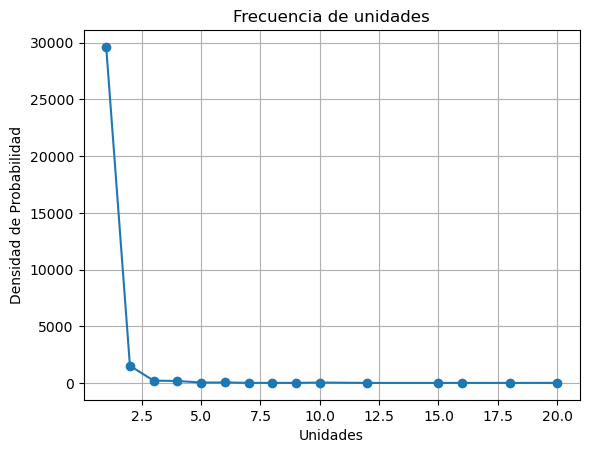

In [92]:
plt.plot(info_compras_unidades["Unidades"], info_compras_unidades["Veces"], marker='o')
plt.xlabel('Unidades')
plt.ylabel('Densidad de Probabilidad')
plt.title('Frecuencia de unidades')
plt.grid(True)
plt.show()


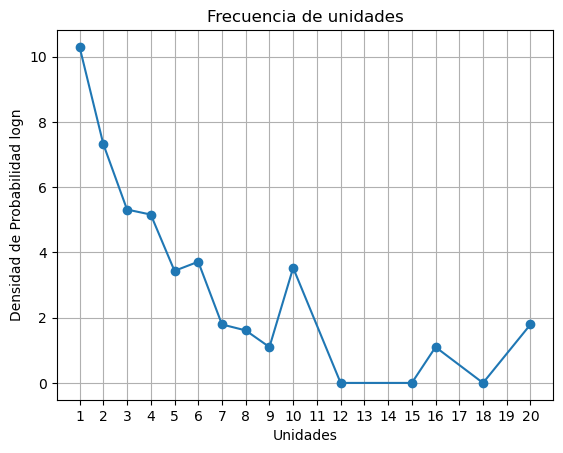

In [93]:
plt.plot(info_compras_unidades["Unidades"], np.log(info_compras_unidades["Veces"]), marker='o')
plt.xlabel('Unidades')
plt.ylabel('Densidad de Probabilidad logn')
plt.title('Frecuencia de unidades')
plt.xticks([x for x in range(1, 21)])
plt.grid(True)
plt.show()

# Aquí podemos ver que no sigue una distribución exponencial

In [94]:
info_veces_productos = info_compras_completas.groupby("Producto").agg({"Producto":"count", "Volumen":"mean"})
info_veces_productos.rename(mapper={"Producto":"Veces"}, axis=1, inplace=True)

info_veces_productos.reset_index(inplace=True)

In [95]:
info_veces_productos

,Producto,Veces,Volumen
0,23,2,0.101579
1,29,2,0.217350
2,30,3,0.002975
3,60,1,0.001000
4,66,5,0.003452
...,...,...,...
4756,52942,1,0.011427
4757,52984,1,0.001000
4758,52993,1,0.001125
4759,53014,1,0.000932


In [96]:
info_veces_productos.describe()

,Producto,Veces,Volumen
count,4761.000000,4761.000000,4.761000e+03
mean,27429.013233,6.648603,1.034189e-01
std,15038.019317,14.435972,3.033956e-01
min,23.000000,1.000000,1.000000e-08
25%,17238.000000,1.000000,9.568000e-04
50%,28005.000000,2.000000,4.509000e-03
75%,40445.000000,5.000000,4.556950e-02
max,53475.000000,282.000000,3.850000e+00


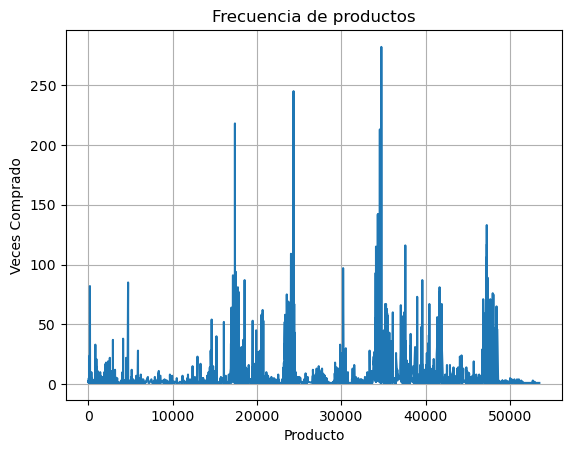

In [97]:
plt.plot(info_veces_productos["Producto"], info_veces_productos["Veces"])
plt.xlabel('Producto')
plt.ylabel('Veces Comprado')
plt.title('Frecuencia de productos')
plt.grid(True)
plt.show()

## Cálculo Ubicaciones



In [98]:
for i, j in enumerate(info_ubicaciones["Calle"]):
    j = str(j)
    if "AVE " in j.upper():
        info_ubicaciones.loc[i, "Calle"] = "AV "+j[4:]
    if "LIC " in j.upper():
        info_ubicaciones.loc[i, "Calle"] = j[4:]

info_ubicaciones

,Colonia,codigo postal,Calle,numero de casa
0,FIERRO MTY,64590,JESUS M GARZA,4026
1,VALLE DE SANTA LUCIA MTY,64140,PEDRO ZORRI,404
2,JARDINES DEL PAS MTY,64900,AV FUNDADORES,5300
3,CIUDAD NATURA,64989,AV ABRAHAM LIN,4001
4,VILLA LOS PINOS MTY,64770,PINO SILVESTRE,2923
...,...,...,...,...
144,LOMA BONITA MTY,64250,ZOCALO,6141
145,VILLA ALEGRE MTY,64130,VILLA ALEGRE,8616
146,SAN JOSE MTY,64270,AV LINCOLN,2503
147,TOPOCHICO 5TO. SECTOR,64260,ABASOLO,6845


In [99]:
def concat_dir(df):
    concat = []
    for i in df.values:
        s = str(i[3])+", "+str(i[2])+", Monterrey, Nuevo León, "+ str(i[1])+ ", México"
        concat.append(s)
    return concat


info_ubicaciones["direccion"] = concat_dir(info_ubicaciones)
info_ubicaciones

,Colonia,codigo postal,Calle,numero de casa,direccion
0,FIERRO MTY,64590,JESUS M GARZA,4026,"4026, JESUS M GARZA, Monterrey, Nuevo León, 64..."
1,VALLE DE SANTA LUCIA MTY,64140,PEDRO ZORRI,404,"404, PEDRO ZORRI, Monterrey, Nuevo León, 64140..."
2,JARDINES DEL PAS MTY,64900,AV FUNDADORES,5300,"5300, AV FUNDADORES, Monterrey, Nuevo León, 64..."
3,CIUDAD NATURA,64989,AV ABRAHAM LIN,4001,"4001, AV ABRAHAM LIN, Monterrey, Nuevo León, 6..."
4,VILLA LOS PINOS MTY,64770,PINO SILVESTRE,2923,"2923, PINO SILVESTRE, Monterrey, Nuevo León, 6..."
...,...,...,...,...,...
144,LOMA BONITA MTY,64250,ZOCALO,6141,"6141, ZOCALO, Monterrey, Nuevo León, 64250, Mé..."
145,VILLA ALEGRE MTY,64130,VILLA ALEGRE,8616,"8616, VILLA ALEGRE, Monterrey, Nuevo León, 641..."
146,SAN JOSE MTY,64270,AV LINCOLN,2503,"2503, AV LINCOLN, Monterrey, Nuevo León, 64270..."
147,TOPOCHICO 5TO. SECTOR,64260,ABASOLO,6845,"6845, ABASOLO, Monterrey, Nuevo León, 64260, M..."


In [100]:
def probar_dif_versiones(texto, geolocator):
    # Sin código postal
    indice = len(texto)
    for i in range(2):
        indice = texto[:indice-1].rfind(",")
    location = geolocator.geocode(texto[:indice])
    if location!=None:
        return location.latitude, location.longitude

    # Sin calle
    indice1 = texto.find(",")
    indice2 = texto[indice1+1:].find(",")+indice1+1

    t = texto[:indice1]+texto[indice2:]
    location = geolocator.geocode(t)
    if location!=None:
        return location.latitude, location.longitude

    return None, None


In [101]:
def get_lat_long(lista):
    lat = []
    lon = []
    geolocator = Nominatim(user_agent="my_geocoder", timeout=1000)  # Replace with your user agent
    for i in lista:
        location = geolocator.geocode(i)
        if location:
            a = location.latitude
            b = location.longitude
        else:
            a, b = probar_dif_versiones(i, geolocator)
        lat.append(a)
        lon.append(b)
    return lat, lon


In [102]:
lat, lon = get_lat_long(info_ubicaciones["direccion"])
info_ubicaciones["latitud"] = lat
info_ubicaciones["longitud"] = lon


In [103]:
info_ubicaciones

,Colonia,codigo postal,Calle,numero de casa,direccion,latitud,longitud
0,FIERRO MTY,64590,JESUS M GARZA,4026,"4026, JESUS M GARZA, Monterrey, Nuevo León, 64...",25.686482,-100.273079
1,VALLE DE SANTA LUCIA MTY,64140,PEDRO ZORRI,404,"404, PEDRO ZORRI, Monterrey, Nuevo León, 64140...",25.658769,-100.307752
2,JARDINES DEL PAS MTY,64900,AV FUNDADORES,5300,"5300, AV FUNDADORES, Monterrey, Nuevo León, 64...",25.625050,-100.301162
3,CIUDAD NATURA,64989,AV ABRAHAM LIN,4001,"4001, AV ABRAHAM LIN, Monterrey, Nuevo León, 6...",25.632088,-100.286045
4,VILLA LOS PINOS MTY,64770,PINO SILVESTRE,2923,"2923, PINO SILVESTRE, Monterrey, Nuevo León, 6...",25.636429,-100.288347
...,...,...,...,...,...,...,...
144,LOMA BONITA MTY,64250,ZOCALO,6141,"6141, ZOCALO, Monterrey, Nuevo León, 64250, Mé...",25.734247,-100.338346
145,VILLA ALEGRE MTY,64130,VILLA ALEGRE,8616,"8616, VILLA ALEGRE, Monterrey, Nuevo León, 641...",25.744850,-100.366996
146,SAN JOSE MTY,64270,AV LINCOLN,2503,"2503, AV LINCOLN, Monterrey, Nuevo León, 64270...",25.714393,-100.349825
147,TOPOCHICO 5TO. SECTOR,64260,ABASOLO,6845,"6845, ABASOLO, Monterrey, Nuevo León, 64260, M...",25.740099,-100.333635


In [104]:
# info_ubicaciones.to_excel("ubicaciones_completas.xlsx", index=False)

## Matriz de distancias

In [105]:
def haversine_distance(ubi1, ubi2):
    lat1 = info_ubicaciones["latitud"][ubi1]
    lon1 = info_ubicaciones["longitud"][ubi1]
    lat2 = info_ubicaciones["latitud"][ubi2]
    lon2 = info_ubicaciones["longitud"][ubi2]

    # Radio de la Tierra en kilómetros
    earth_radius = 6371.0
    
    # Convertir las latitudes y longitudes a radianes
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Diferencias de latitud y longitud
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    
    # Calcular el haversine
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = earth_radius * c
    
    # resultado en km
    return distance




In [106]:
matriz = np.zeros((info_ubicaciones.shape[0], info_ubicaciones.shape[0]))


In [107]:
for fila, i in enumerate(matriz):
    for columna in range(len(i)):
        matriz[fila][columna] = haversine_distance(fila, columna)



In [108]:
matriz_distancias = pd.DataFrame(matriz)

In [109]:
matriz_distancias

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.000000,4.644359,7.388132,6.186319,5.772193,5.036002,9.330111,16.140844,9.442485,5.372941,...,2.280207,8.923239,5.388147,9.330111,11.916065,8.424167,11.430151,8.292262,8.505951,9.330111
1,4.644359,0.000000,3.807212,3.679257,3.155105,1.826380,13.901149,15.799689,9.060083,2.548120,...,3.369372,8.889337,1.306315,13.901149,10.634030,8.935000,11.262847,7.485248,9.407940,13.901149
2,7.388132,3.807212,0.000000,1.705719,1.803155,2.406617,15.796092,19.259426,12.676565,6.096034,...,5.254186,12.581314,4.603304,15.796092,13.900249,12.701062,14.865216,11.067037,13.200286,15.796092
3,6.186319,3.679257,1.705719,0.000000,0.535003,1.860719,14.191158,19.478355,12.730885,6.215290,...,3.932772,12.533617,4.821548,14.191158,14.275172,12.510305,14.933666,11.163016,12.922422,14.191158
4,5.772193,3.155105,1.803155,0.535003,0.000000,1.331285,13.993604,18.954619,12.200552,5.696828,...,3.551357,12.000004,4.320307,13.993604,13.766777,11.975356,14.403188,10.635488,12.388721,13.993604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,8.424167,8.935000,12.701062,12.510305,11.975356,10.669756,14.711281,7.743493,1.822319,6.675168,...,9.880290,1.058910,8.153702,14.711281,4.668515,0.000000,3.102337,2.489175,0.803833,14.711281
145,11.430151,11.262847,14.865216,14.933666,14.403188,13.072983,17.668375,4.721020,2.202896,8.783251,...,12.707884,2.524633,10.266515,17.668375,2.748493,3.102337,0.000000,3.798429,3.382842,17.668375
146,8.292262,7.485248,11.067037,11.163016,10.635488,9.304203,15.906274,8.335656,1.619071,4.987140,...,9.215176,1.755562,6.468224,15.906274,3.625769,2.489175,3.798429,0.000000,3.286438,15.906274
147,8.505951,9.407940,13.200286,12.922422,12.388721,11.100877,14.290031,7.833499,2.539447,7.244667,...,10.107066,1.808029,8.702385,14.290031,5.294322,0.803833,3.382842,3.286438,0.000000,14.290031


## Simulación

In [110]:
repeticiones = 10000

def simulacion(df, repeticiones):
    unidades = []
    for i in range(repeticiones):
        rand = random.random()
        for j in df.index:
            if (rand>=df.iloc[j]["Límite inferior"]) and (rand<df.iloc[j]["Límite superior"]):
                unidades.append(df.iloc[j]["Unidades"])
                break
    return unidades

#### Unidades que se pedirán
**Usando una distribución exponencial**

In [111]:
estimated_lambda = len(np.log(info_compras_unidades["Veces"])) / np.sum(np.log(info_compras_unidades["Veces"]))
print("Parámetro estimado lambda:", estimated_lambda)

Parámetro estimado lambda: 0.325006389364445


In [112]:
def calc_probabilidades_exp(df, l):
    probabilidades_exp = []
    for x in df:
        probabilidades_exp.append(l*np.exp(-l*x)) 
    return probabilidades_exp

In [113]:
info_compras_unidades_exponencial = info_compras_unidades.copy()

In [114]:
info_compras_unidades_exponencial["Probabilidad"] = calc_probabilidades_exp(info_compras_unidades_exponencial["Unidades"], estimated_lambda)
info_compras_unidades_exponencial["Probabilidad Acumulada"] = info_compras_unidades_exponencial["Probabilidad"].cumsum()
info_compras_unidades_exponencial["Límite inferior"] = info_compras_unidades_exponencial["Probabilidad Acumulada"] - info_compras_unidades_exponencial["Probabilidad"]
info_compras_unidades_exponencial["Límite superior"] = info_compras_unidades_exponencial["Probabilidad Acumulada"]

In [115]:
info_compras_unidades_exponencial

,Unidades,Veces,Probabilidad,Probabilidad Acumulada,Límite inferior,Límite superior
0,1,29635,0.234825,0.234825,0.000000,0.234825
1,2,1510,0.169666,0.404491,0.234825,0.404491
2,3,203,0.122588,0.527078,0.404491,0.527078
3,4,174,0.088572,0.615650,0.527078,0.615650
4,5,31,0.063996,0.679646,0.615650,0.679646
5,6,41,0.046238,0.725884,0.679646,0.725884
6,7,6,0.033408,0.759292,0.725884,0.759292
7,8,5,0.024138,0.783430,0.759292,0.783430
8,9,3,0.017440,0.800871,0.783430,0.800871
9,10,34,0.012601,0.813472,0.800871,0.813472


In [116]:
unidades_exp = simulacion(info_compras_unidades_exponencial, repeticiones)

In [117]:
lista_unidades = []
for i in info_compras_unidades_exponencial.index:
    for j in range(int(info_compras_unidades_exponencial.iloc[i]["Veces"])):
        lista_unidades.append(info_compras_unidades_exponencial.iloc[i]["Unidades"])

In [118]:
print("Promedio simulación exponencial:", sum(unidades_exp)/repeticiones)
print("Promedio real:", np.mean(lista_unidades))

Promedio simulación exponencial: 2.7657
Promedio real: 1.1064320465028117


In [119]:
print("Con la comparación del promedio real y el simulado podemos comprobar que la distribución de los datos no es exponencial.")

Con la comparación del promedio real y el simulado podemos comprobar que la distribución de los datos no es exponencial.


**Usando las frecuencias relativas**

In [120]:
info_compras_unidades["Frecuencia Relativa"] = info_compras_unidades["Veces"]/info_compras_unidades["Veces"].sum()
info_compras_unidades["FR Acumulada"] = info_compras_unidades["Frecuencia Relativa"].cumsum()
info_compras_unidades["Límite inferior"] = info_compras_unidades["FR Acumulada"] - info_compras_unidades["Frecuencia Relativa"]
info_compras_unidades["Límite superior"] = info_compras_unidades["FR Acumulada"]

info_compras_unidades

,Unidades,Veces,Frecuencia Relativa,FR Acumulada,Límite inferior,Límite superior
0,1,29635,0.936217,0.936217,0.000000,0.936217
1,2,1510,0.047703,0.983920,0.936217,0.983920
2,3,203,0.006413,0.990333,0.983920,0.990333
3,4,174,0.005497,0.995830,0.990333,0.995830
4,5,31,0.000979,0.996809,0.995830,0.996809
5,6,41,0.001295,0.998105,0.996809,0.998105
6,7,6,0.000190,0.998294,0.998105,0.998294
7,8,5,0.000158,0.998452,0.998294,0.998452
8,9,3,0.000095,0.998547,0.998452,0.998547
9,10,34,0.001074,0.999621,0.998547,0.999621


In [121]:
unidades_fr = simulacion(info_compras_unidades, repeticiones)

In [122]:
print("Promedio simulación frecuencia relativa:", sum(unidades_fr)/repeticiones)
print("Promedio real:", np.mean(lista_unidades))

Promedio simulación frecuencia relativa: 1.1088
Promedio real: 1.1064320465028117


In [123]:
simulacion_unidades_df = pd.DataFrame(unidades_fr)
simulacion_unidades_df.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


#### Producto que se pedirá
**Usando las frecuencias relativas**

In [124]:
info_veces_productos["Frecuencia Relativa"] = info_veces_productos["Veces"]/info_veces_productos["Veces"].sum()
info_veces_productos["FR Acumulada"] = info_veces_productos["Frecuencia Relativa"].cumsum()
info_veces_productos["Límite inferior"] = info_veces_productos["FR Acumulada"] - info_veces_productos["Frecuencia Relativa"]
info_veces_productos["Límite superior"] = info_veces_productos["FR Acumulada"]



In [125]:
info_veces_productos

,Producto,Veces,Volumen,Frecuencia Relativa,FR Acumulada,Límite inferior,Límite superior
0,23,2,0.101579,0.000063,0.000063,0.000000,0.000063
1,29,2,0.217350,0.000063,0.000126,0.000063,0.000126
2,30,3,0.002975,0.000095,0.000221,0.000126,0.000221
3,60,1,0.001000,0.000032,0.000253,0.000221,0.000253
4,66,5,0.003452,0.000158,0.000411,0.000253,0.000411
...,...,...,...,...,...,...,...
4756,52942,1,0.011427,0.000032,0.999874,0.999842,0.999874
4757,52984,1,0.001000,0.000032,0.999905,0.999874,0.999905
4758,52993,1,0.001125,0.000032,0.999937,0.999905,0.999937
4759,53014,1,0.000932,0.000032,0.999968,0.999937,0.999968


In [126]:
lista_productos = []
for i in info_veces_productos.index:
    for j in range(int(info_veces_productos.iloc[i]["Veces"])):
        lista_productos.append(info_veces_productos.iloc[i]["Producto"])

In [127]:
def simulacion_producto(df, repeticiones):
    productos = []
    for i in range(repeticiones):
        rand = random.random()
        for j in df.index:
            if (rand>=df.iloc[j]["Límite inferior"]) and (rand<df.iloc[j]["Límite superior"]):
                productos.append(df.iloc[j]["Producto"])
                break
    return productos

In [128]:
productos = simulacion_producto(info_veces_productos, repeticiones)

In [129]:
print("Promedio simulación frecuencia relativa:", sum(productos)/repeticiones)
print("Promedio real:", np.mean(lista_productos))

Promedio simulación frecuencia relativa: 29602.646
Promedio real: 29598.876571681303


In [130]:
simulacion_productos_df = pd.DataFrame(productos)
simulacion_productos_df.head()

,0
0,16974.0
1,47949.0
2,30213.0
3,17235.0
4,23290.0


In [131]:
# simulacion_productos_df.to_excel("simulacion_productos.xlsx", index=False)

In [134]:
tabla_simulacion = pd.DataFrame()
tabla_simulacion["Cliente"] = [i for i in range(len(simulacion_productos_df))]
tabla_simulacion["Unidades"] = simulacion_unidades_df
tabla_simulacion["Producto"] = simulacion_productos_df.copy()


In [135]:
tabla_simulacion

,Cliente,Unidades,Producto
0,0,1.0,16974.0
1,1,1.0,47949.0
2,2,1.0,30213.0
3,3,1.0,17235.0
4,4,1.0,23290.0
...,...,...,...
9995,9995,1.0,20316.0
9996,9996,1.0,35768.0
9997,9997,1.0,46914.0
9998,9998,2.0,24471.0


In [5]:
info_productos.set_index("Producto", inplace=True)
info_productos

,Volumen mtro3
Producto,
1,0.001050
2,0.026710
3,0.020000
4,0.056515
5,0.025238
...,...
53628,0.000266
53629,0.000560
53630,0.000540


In [7]:
tabla_simulacion = pd.read_excel("Datos_reto/simulacion_final_completa.xlsx")
tabla_simulacion

,Cliente,Unidades,Producto
0,0,1,16974
1,1,1,47949
2,2,1,30213
3,3,1,17235
4,4,1,23290
...,...,...,...
9995,9995,1,20316
9996,9996,1,35768
9997,9997,1,46914
9998,9998,2,24471


In [23]:
info_productos.columns

Index([' Volumen mtro3'], dtype='object')

In [29]:
tabla_simulacion["Volumen"] = tabla_simulacion["Unidades"]*(info_productos.loc[tabla_simulacion["Producto"], " Volumen mtro3"].values)

In [30]:
tabla_simulacion

,Cliente,Unidades,Producto,Volumen
0,0,1,16974,0.000932
1,1,1,47949,0.000504
2,2,1,30213,0.071824
3,3,1,17235,0.000583
4,4,1,23290,0.526842
...,...,...,...,...
9995,9995,1,20316,0.001125
9996,9996,1,35768,0.036190
9997,9997,1,46914,0.006222
9998,9998,2,24471,0.434700


In [33]:
# tabla_simulacion.to_excel("simulacion_final_completa.xlsx", index=False)